# Spredning av sykdom

<div class="alert alert-block alert-danger">
    
Info til lærer:
    
Dette opplegget er delt i tre deler. 

- Første del er en innføring om sykdom og spredning. Dette kan elevene enten jobbe med selv, eller tas i plenum.
- Andre del er en innføring i SIR-modellen som brukes av blant annet FHI for å simulere smittespredningen. Modellen presenteres stegvis og bygges sakte ut slik at det skal være mulig å se hva som skjer i hvert steg.
- Tredje og siste del er et simuleringsprogram som bruker SIR-modellen, men som er mye mer avansert. Her er det ikke meningen at elevene skal skjønen koden, men mer at de skal leke seg og se hvordan ulike parametre påvirker utviklingen. 

Dette opplegget bør fordeles over flere timer, da det blir veldig mye for en økt på 90 min. 

Mål for timen er:

<div class="alert alert-block alert-info">
    
Naturfag vg1
- drøfte aktuelle helse- og livsstilsspørsmål og vurdere pålitelighet i informasjon fra ulike kilder

Biologi 1
- gjere greie for korleis virale og mikrobielle sjukdommar oppstår, spreier seg og blir nedkjempa
- drøfte korleis vaksinar førebyggjer og vernar mot sjukdom på individ- og populasjonsnivå
- planleggje og gjennomføre undersøkingar, samle, behandle og tolke data, og presentere resultat og funn

## Epidemi versus pandemi

Vi bruker ofte ordene epidemi og pandemi om spredning av sykdommer.

<div class="alert alert-block alert-success">

- <a title = "fra gresk ''epi'' som betyr over og ''demos'' som betyr folk">Epidemi</a> er et utbrudd av sykdom som sprer seg raskt mellom mennesker i mindre områder. Eksempler på epidemier er influensa, kolera, malaria, diare-sykdommer og meslinger.
- <a title = "fra gresk ''pan'' som betyr alt og ''demos'' som betyr folk">Pandemi</a> er et utbrudd av sykdom som sprer seg raskt mellom mennesker i et større geografisk område. Eksempler på pandemier er svineinfluensautbruddeet i 2009 og nå koronaviruset.

## Forskjellige typer epidemier

Noen av de mest kjente epidemiene er Hiv-epidemien og Ebola-epidemien. På nettsiden til <a href="https://legerutengrenser.no/helse/epidemier-og-pandemier">Leger Uten Grenser</a> beskrives disse to epidemiene. 

<div class="alert alert-block alert-success">

Spredning av epidemier kan skje gjennom mange bærere der typiske eksempler er mennesker, insekter, vann, og andre dyr. Typiske eksempler på sykdom som smitter via insekter er malaria, dengue fever og zika virus. Eksempler på sykdom som smitter gjennom vann (og sanitærforhold) er hepatitt og kolera.

## Korona og spredning

Bruk følgende lenker for å lese mer om koronaviruset og spredningen av den.

<a href="https://www.fhi.no/sv/smittsomme-sykdommer/corona/">FHI sine nettisder om Koronaviruset.</a>

<a href="https://sml.snl.no/koronapandemien">Store medisinske leksikon sine nettisder om Koronaviruset.</a>

Følgende kode viser spredningen i Norge fra mars 2020 til januar 2022. Dataene er hentet direkte fra FHI.

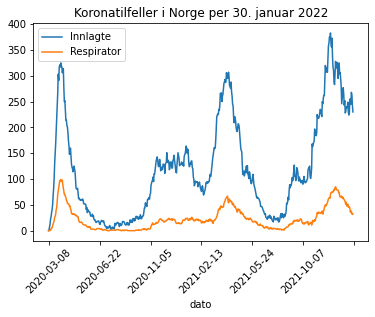

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("Covid_19_Norge2.csv", sep='\t', index_col = 0)

ax = plt.gca()
data.plot(x = 'dato', y = 'Innlagte', ax = ax)
data.plot(x = 'dato', y = 'Respirator', ax = ax)
plt.xticks(rotation=45)
plt.title("Koronatilfeller i Norge per 30. januar 2022")

plt.show()

Fra samme datasett kan vi også hente ut antallet smittede i Norge totalt fordelt på kjønn og alder.

<AxesSubplot:xlabel='Aldersgrupper', ylabel='Antall smittede'>

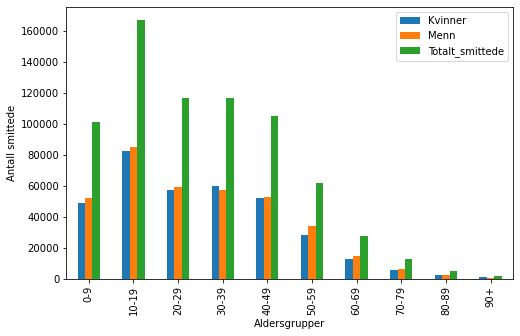

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Leser inn data (hver linje nedenfor leser inn én kolonne fra filen)
alder = pd.read_csv("Covid-kjonn2.csv", sep = '\t' )   # Hentet fra https://www.fhi.no/

# Lager søylediagram
alder.plot(x = "Aldersgrupper", 
           y = ["Kvinner", "Menn", "Totalt_smittede"], 
           kind="bar", 
           ylabel = "Antall smittede",
           xlabel = "Aldersgrupper",
           figsize = (8,5),
          )


# SIR-modellen

En rimelig enkel modell for smitteutbrudd er det vi kaller for SIR-modellen. SIR står for de engelske ordene:

<div class="alert alert-block alert-success">

- Susceptible (de som kan bli smittet)
- Infected (de som er smittet)
- Recovered (de som er blitt friske eller som har dødd)

</div>    
    
Vi skal her forklare modellens oppbygning, også bruke den i en del simuleringer. For en diskusjon rundt bruken av modellen se link til <a href="https://tidsskriftet.no/2020/03/kronikk/covid-19-simuleringsmodeller-ved-epidemier">Tidsskriftet for den norske legeforening</a>.

Bildet under viser hvordan man tenker at en sykdom utvikler seg i et samfunn, hentet fra linken over.

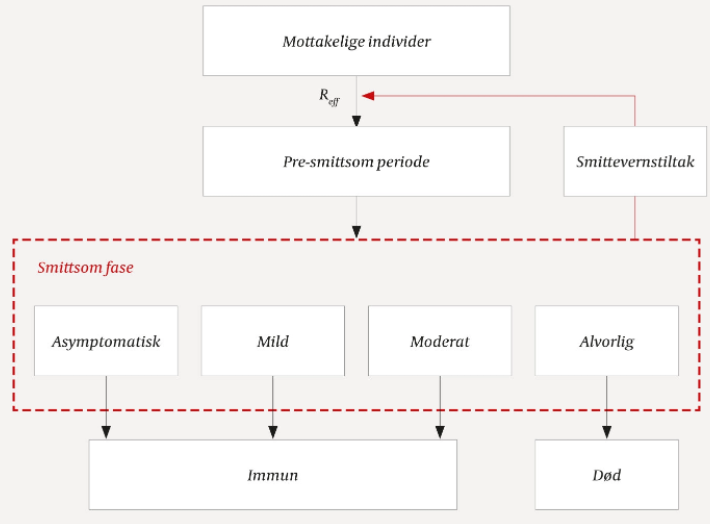

<div class="alert alert-block alert-info">

## Oppgave 1

Les artikkelen fra <a href="https://tidsskriftet.no/2020/03/kronikk/covid-19-simuleringsmodeller-ved-epidemier">Tidsskriftet for den norske legeforening</a>. Diskuter med gruppen:
    
a) Hva er $R_0$ og $R_{\text{eff}}$? Hvorfor har de brukt $R_{\text{eff}}$ i modellen over?
    
b) Hva betyr __asymptomatisk__?
    
c) Hva er forskjellen på __pre-smittsom periode__ og __smittsom fase__?
    
d) Hvorfor peker __smittevernstiltak__ tilbake på $R_{\text{eff}}$?
    
e) Hvorfor vil epidemien dø ut når $R < 1$?

## Modell for spredning

Når vi skal modellere spredning av en sykdom, starter vi med å se på hvordan antallet som er smittet ($I$ fra SIR-modellen) endres. Hvis vi tenker at vi har $I$ personer som er smittet en dag, vil antallet som er smittet neste dag være direkte avhengig av $I$. 

<div class="alert alert-block alert-info">
    
### Oppgave 2

Hvis vi måler antallet smittede på en mandag, hvorfor vil dette påvirke antallet smittede når vi måler neste mandag?

Vi kan sette opp et uttrykk som viser utviklingen hvis vi lar smitten gå uten noen begrensinger. Her er $I_n$ antall smittede en uke, og $I_{n+1}$ er antall smittede neste uke. Tallet $a$ forteller hvor stor andel av de som er smittet som sprer sykdommen videre.

<div class="alert alert-block alert-success">

$$I_{n+1} = I_n + a\cdot I_n$$

</div>
    
Dette kan vi nå vise ved å plotte utviklingen. Vi lager et kort program som plotter utviklingen.

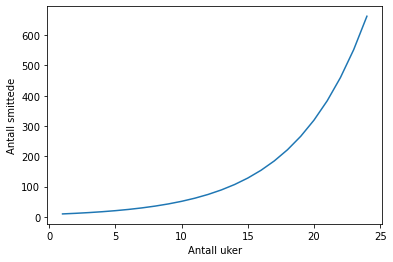

In [5]:
# Smittespredningsmodell forsøk 1

from pylab import *
import matplotlib as plt

#########################################################
# Startverdier (det er her vi skal endre på verdier)    #
#########################################################

tid = 24                  # antall uker vi modellerer
a = 0.2                   # spredningsraten
I = 10                    # antallet personer som er smittet ved start

##########################################################

infiserte = [I]           # liste der antallet smittede blir lagret
t = linspace(1, tid, tid) # tidsperioden      

for i in range(1, tid):   # smitteutvikling for ukene i intervallet
    I = I + a*I
    infiserte.append(I)
    
# Tegner graf
plot(t, infiserte)
xlabel("Antall uker")
ylabel("Antall smittede")
show()

<div class="alert alert-block alert-info">

### Oppgave 3

Endre på startverdiene i programmet over (linje 10-12) og se hvordan grafen endrer seg. Pass på at det ofte er y-aksen som endrer seg.
    
a) Beskriv kurveforløpet

b) Diskuter hvor realistisk modellen er
    
c) Hvilke faktorer mener du vil begrense smitten?

d) Hvordan tror du smittekurven vil se ut i virkeligheten?

Grafen over viser det vi kaller en eksponentiell vekst, det vil at antall smittede vil bare øke og øke, uten noen form for kontroll. 

<div class="alert alert-block alert-info">

### Oppgave 4

a) Hvorfor blir ikke dette korrekt?
    
b) Hva er det som vil begrense smitten?

</div>

En av mange ting som ikke er korrekte med grafen over er at antallet mennesker som _kan_ bli smittet vil avta etterhvert. Vi sier at antallet mennekser som er __mottakelige__ for smitte vil avta og dermed vil også antallet smittede avta. Vi kan nå forbedre modellen vår i to ledd. Først vil antallet som blir smittet (infisert, $I$) endres noe siden antallet nye smittede vil også være avhengige av hvor mange der er mulig å smitte $(S)$. 

<div class="alert alert-block alert-success">

$$I_{n+1} = I_n + a\cdot I_n\cdot S_n$$

</div>
    
I tillegg kan ikke det totale antallet mennesker endre seg, og vi regner med at alle nå _enten_ er smittet ($I$) _eller_ kan bli smittet ($S$). Antall som kan bli smittet vil da minke ettersom flere og flere blir smittet. 

<div class="alert alert-block alert-success">

$$S_{n+1} = S_n - a\cdot I_n\cdot S_n$$
    
</div>

<div class="alert alert-block alert-info">

### Oppgave 5

I uttrykkene for $I_{n+1}$ og $S_{n+1}$ er siste ledd $a\cdot I_n\cdot S_n$ likt, bare med forskjellig fortegn. Hva betyr dette?

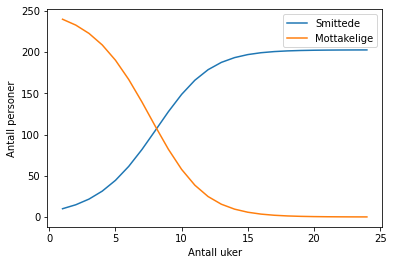

In [6]:
# Smittespredningsmodell forsøk 2

from pylab import *
import matplotlib as plt

#########################################################
# Startverdier (det er her vi skal endre på verdier)    #
#########################################################

tid = 24                  # antall uker vi modellerer
a = 0.002                 # spredningsraten
N = 250                   # antallet person i området
I = 10                    # antallet personer som er smittet ved start

##########################################################

S = N - I                 # antallet personer kan bli smittet ved start
mottakelige = [S]         # liste der antallet som kan bli smittet blir lagret
infiserte = [I]           # liste der antallet smittede blir lagret
t = linspace(1, tid, tid) # tidsperioden      

for i in range(1, tid):   # smitteutvikling for ukene i intervallet
    I = I + a*I*S
    infiserte.append(I)
    S = S - a*I*S
    mottakelige.append(S)
    
# Tegner graf
plot(t, infiserte, label = "Smittede")
plot(t, mottakelige, label = "Mottakelige")
legend()
xlabel("Antall uker")
ylabel("Antall personer")
show()

<div class="alert alert-block alert-info">

### Oppgave 6
    
a) Beskriv og forklar hvilke faktorer som påvirker formen på grafen
    
b) Endre på variablene i koden over (linje 10 - 13) og se hva som skjer. Noen ganger kan grafen blir rar, klarer du å forklare hvorfor?
    
c) Hva er det denne modellen ikke tar hensyn til. Hvorfor er ikke dette en god nok modell for spredning av en sykdom?

## Utvidelse av modellen

En (av mange) ting modellen over ikke tar hensyn til er at man kan bli frisk igjen etter å ha fått sykdommen. Modellen vi bruker her kaller dette $R$ (recovered). Litt interessant brukes $R$ om både de som har blitt friske _og_ de som døde av sykdommen. Strengt tatt har de ikke sykdommen lengere ...

For å ta hensyn til $R$ lager vi et tall som sier noe om hvor raskt de som er smittet blir friske igjen. Dette tallet kaller vi for $b$. Vi kan da lage uttrykket:

<div class="alert alert-block alert-success">

$$R_{n+1} = R_n + b\cdot I_n$$

</div>
    
Ved starten er antall som er kvitt sykdommen null, men dette vil øke med en viss andel av de som er smittet. Tilsvarende vil antallet som er smittet synke med samme andel. Vi legger derfor til enda en liten bit på smittet-uttrykket.

<div class="alert alert-block alert-success">

$$I_{n+1} = I_n + a\cdot I_n\cdot S_n - b\cdot I_n$$
    
</div>

Vi legger siste utviklingen av modellen vår inn i programmet. 

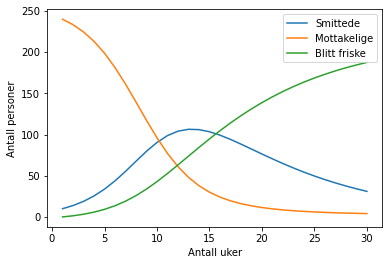

In [7]:
# Smittespredningsmodell forsøk 3

from pylab import *
import matplotlib as plt

#########################################################
# Startverdier (det er her vi skal endre på verdier)    #
#########################################################

tid = 30                  # antall uker vi modellerer
a = 0.002                 # spredningsraten
b = 0.1                   # blir-frisk raten
N = 250                   # antallet person i området
I = 10                    # antallet personer som er smittet ved start
R = 0                     # antallet immune fra start

##########################################################

S = N - I - R             # antallet personer kan bli smittet ved start
mottakelige = [S]         # liste der antallet som kan bli smittet blir lagret
infiserte = [I]           # liste der antallet smittede blir lagret
blitt_friske = [R]
t = linspace(1, tid, tid) # tidsperioden      

for i in range(1, tid):   # smitteutvikling for ukene i intervallet
    I = I + a*I*S - b*I
    infiserte.append(I)
    S = S - a*I*S
    mottakelige.append(S)
    R = R + b*I
    blitt_friske.append(R)
    
# Tegner graf
plot(t, infiserte, label = "Smittede")
plot(t, mottakelige, label = "Mottakelige")
plot(t, blitt_friske, label = "Blitt friske")
legend()
xlabel("Antall uker")
ylabel("Antall personer")
show()

<div class="alert alert-block alert-info">

### Oppgave 7
    
a) Beskriv og forklar hvilke faktorer som påvirker formen på grafen
    
b) Endre på variablene i koden over (linje 10 - 15) og se hva som skjer. Noen ganger kan grafen blir rar, klarer du å forklare hvorfor?
    
c) Hva er det denne modellen ikke tar hensyn til. Hvorfor er ikke dette en god nok modell for spredning av en sykdom?

## Hva påvirker smittekurven?

I oppgave 6 diskuterte dere kanskje begreper som <a title = "Befolkningen deles inn i grupper slik at det er liten mulighet for smittespredning mellom gruppene">kohort</a>, vaksine, R-tall, osv.





<div class="alert alert-block alert-info">

### Oppgave 8

Under en pandemi vil smittekurven stadig endre. Diskuter hvordan smittekurven vil endres ved forandring av:
    
· R-tallet

· Kohortstørrelse

· Kontakt innen kohorten mellom individene

· Bevegelse mellom kohorter

· Vaksinegrad

· Smitteverntiltak

I programmet under (som er stort) vil vi simulere spredning av en sykdom i en befolkning. 

I linjene 22 til 31 kan dere endre på variablene og se hvordan forskjellige startverdier vil påvirke utviklingne av sykdommen. Tenk gjennom følgende spørsmål når dere prøver forskjellige verdier:

<div class="alert alert-block alert-info">

### Oppgave 9

Under en pandemi vil smittekurven stadig endre. Diskuter hvordan smittekurven vil endres ved forandring av:
    
a) Hvordan kan de ulike verdiene kobles til smittevernstiltak

b) Hva er nytten av en slik simulering (modell)?

c) Hva er svakhetene til en slik simulering (modell)?

d) Hvilke andre variabler kunne modellen tatt hensyn til?

<IPython.core.display.Javascript object>


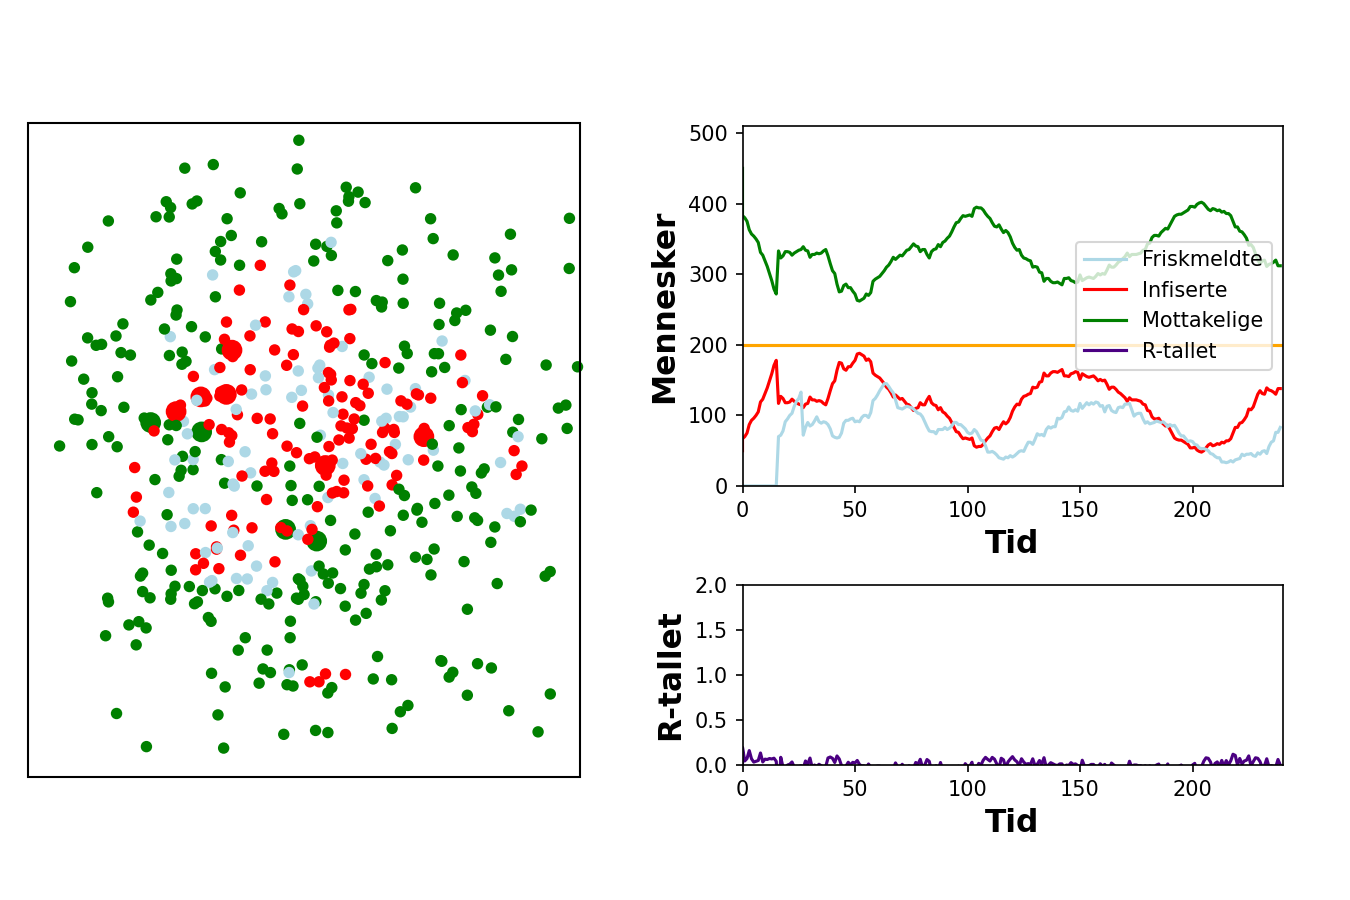

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import random
from sim_person import Person

from matplotlib.animation import FuncAnimation

# Enable interactive plot (jupyter)
%matplotlib notebook

"""
    Endre parametrene under for å oppnå ulike smitteforløp.
    Finn ut om det er bedre at verdier oppgis som antall mennesker, fremfor som prosentandeler.
"""


##################################################################
##  Startverdier - ENDRE PARAMETRE HER
##################################################################

tid = 240                    # antall dager vi simulerer
N = 500                      # antall personer i populasjonen
start_smittede = 10          # prosentandel infiserte individer ved start (0-100%)
kontaktrate = 30             # smittsomhets radius (0-100)
p_smittsomhet = 60           # smittsomhet - sannsynlighet for å overføre sykdom (0-100%)
tid_infeksjon = 15           # tid det tar å bli frisk igjen (0-uendelig)
sykehuskapasitet = 200       # antall personer som kan legges inn på sykehus
fart = "tilfeldig"           # 1 - 300. Alternativ: "tilfeldig"
immunitet = 10               # antall immunitetsdager. 0 - evig
vaksinerte = 0               # prosentandel av befolkningen som er vaksinerte


##################################################################
##  IKKE ENDRE KODEN UNDER
##################################################################

start_smittede = int(N * start_smittede / 100)
vaksinerte = int(N * vaksinerte / 100)

S = [N - start_smittede]
I = [start_smittede]
R = [0]
t = [0]
R_tallet = [0]

# Opprett populasjon:
# sett alle populasjon på tilfeldige posisjoner. Infiser noen. 
populasjon = []

for i in range(N):
    
    if fart == "tilfeldig": 
        fart = (np.random.random() + 0.5) * 150
    else: 
        fart = fart
    
    # Legge til person i populasjonen
    p = Person(i, 
               fart = fart, 
               tid_infeksjon = tid_infeksjon, 
               tid_immunitet = immunitet)
    populasjon.append(p)
    
# Infiser gitt antall personer
for p in random.sample(populasjon, start_smittede): 
    p.infiser(0)

# Vaksiner gitt andel vaksinerte
for p in random.sample(populasjon, vaksinerte):
    p.vaksiner()


##################################################################
##  Grafikk / animasjon 
##################################################################

# Opprett grafikk

fig = plt.figure(figsize=(9,6))
plot1 = fig.add_axes([0.0,0.1,0.45,0.8])
plot2 = fig.add_axes([0.55,0.46,0.4,0.4])
plot3 = fig.add_axes([0.55,0.15,0.4,0.2])

plot1.axis('off')
plot2.axis([0,tid,0,N+10])
plot3.axis([0,tid,0,2])

scatt = plot1.scatter([p.posX for p in populasjon],
                 [p.posY for p in populasjon],
                 c='green',
                 s=20)

fig2 = plt.Rectangle((0,0),100,100,fill=False)
plot1.add_patch(fig2)

plt_infiserte, = plot2.plot(start_smittede,color="red",label="Infiserte")
plt_friskmeldte, = plot2.plot(start_smittede,color="lightblue",label="Friskmeldte")
plt_mottakelige, = plot2.plot(N,color="green",label="Mottakelige")
plt_R_tallet, = plot3.plot(R_tallet[0], color = "indigo", label = "R-tallet")
plot2.axhline(sykehuskapasitet, color = "orange", label = "sykehuskapasitet")
plot2.legend(handles = [plt_friskmeldte,plt_infiserte, plt_mottakelige, plt_R_tallet])
plot2.set_xlabel("Tid", fontsize = 15, fontweight = 'bold')
plot2.set_ylabel("Mennesker", fontsize = 15, fontweight = 'bold')
plot3.set_xlabel("Tid", fontsize = 15, fontweight = 'bold')
plot3.set_ylabel("R-tallet", fontsize = 15, fontweight = 'bold')


##################################################################
##  Simuler og animer verdier
##################################################################

# animer - oppdater verdier for hele populasjon og oppdater plottene
def animer(frame, S, I, R, t, populasjon, kontaktrate):

    smittede = 0
    friskmeldt = 0
    farger = []                             # grafikk
    størrelser = [20 for p in populasjon]   # grafikk
    kontaktrate = kontaktrate * 0.06
    
    for p in populasjon:
        
        # sjekk hvor lenge personen har vært syk
        p.oppdater_status(frame)
                       
        # animer forflytning for hver person
        p.oppdater_posisjon()
                
        # sjekk om det er personer i nærheten av en syk person og infiser alle
        # innen infeksjonsradiusen (gitt sannsynlighet for smitte)
        if p.infisert:
            for p2 in populasjon:
                if p2.indeks == p.indeks or p2.infisert or p2.friskmeldt or p2.vaksine: 
                    pass
                else:
                    d = p.hent_dist(p2.posX, p2.posY)
                    if d < kontaktrate:
                        if np.random.random() < p_smittsomhet / 100:
                            p2.infiser(frame)
                            størrelser[p2.indeks] = 80
                            
        if p.friskmeldt:
            friskmeldt += 1 # tell antall friskmeldte
        if p.infisert:
            smittede += 1   # tell antall infiserte
        
        farger.append(p.hent_farge())  # endre farge til person
        
    R_tall = (smittede - I[-1]) / I[-1]  # Gamle smittede / nye smittede  
    
    #oppdater plottene
    I.append(smittede)
    R.append(friskmeldt)
    S.append(S[0]-I[-1])
    t.append(frame)
    R_tallet.append(R_tall)


    # Overfør data to the matplotlib grafikk
    offsets=np.array([[p.posX for p in populasjon],
                     [p.posY for p in populasjon]])
    scatt.set_offsets(np.ndarray.transpose(offsets))
    scatt.set_color(farger)
    scatt.set_sizes(størrelser)
    plt_infiserte.set_data(t,I)
    plt_friskmeldte.set_data(t,R)
    plt_mottakelige.set_data(t,S)
    plt_R_tallet.set_data(t,R_tallet)
    #time.sleep(0.1)
    return scatt,plt_infiserte,plt_friskmeldte, plt_mottakelige, plt_R_tallet



##################################################################
##  Kjør simulasjonen
##################################################################

animation = FuncAnimation(fig, 
                          animer,
                          frames = tid,
                          interval = 200,
                          fargs = (S,I,R,t,populasjon,kontaktrate),
                          blit = False,
                          repeat = False)
plt.show()

